In [0]:
#import necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Reading and Visualizing the MNIST Dataset

In [3]:
# Import MNIST data
import warnings
warnings.filterwarnings('ignore')
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [4]:
print (mnist.train.num_examples)
print (mnist.train.images.shape)

55000
(55000, 784)


In [5]:
mnist.train.images[0].shape

(784,)

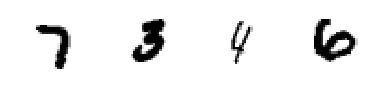

In [6]:
# Determine the (random) indexes of the images that you want to see 
digit_indices_to_print = [300, 2250, 3600, 4000]

# Fill out the subplots with the random images that you defined 
for i in range(len(digit_indices_to_print)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(mnist.train.images[digit_indices_to_print[i]].reshape(28,28),cmap=plt.cm.binary)
    plt.subplots_adjust(wspace=0.5)

plt.show()

### Setting up the hyperparameters

In [0]:
# Parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1

### Initializing the network parameters

In [0]:
# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

### Let's define the Placeholders

In [0]:
# tf Graph input
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

### Setting up Weights and Biases of the whole network

In [10]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

Instructions for updating:
Colocations handled automatically by placer.


### Let's define the MLP now

In [0]:
# Create model
def multilayer_perceptron(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

### Defining Model, Loss and Optimizer

In [12]:
# Construct model
logits = multilayer_perceptron(X)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

train_op = optimizer.minimize(loss_op)


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



### Let's train the model

In [13]:
# Initializing the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([train_op, loss_op], feed_dict={X: batch_x,
                                                            Y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(avg_cost))
    print("Optimization Finished!")

    # Test model
    pred = tf.nn.softmax(logits)  # Apply softmax to logits
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({X: mnist.test.images, Y: mnist.test.labels}))

Epoch: 0001 cost=356.221824681
Epoch: 0002 cost=95.192530257
Epoch: 0003 cost=71.160221480
Epoch: 0004 cost=58.498976049
Epoch: 0005 cost=50.087859576
Epoch: 0006 cost=44.537599174
Epoch: 0007 cost=39.035336980
Epoch: 0008 cost=35.796860128
Epoch: 0009 cost=32.720397322
Epoch: 0010 cost=30.357062924
Epoch: 0011 cost=27.993972609
Epoch: 0012 cost=25.851314588
Epoch: 0013 cost=24.785568114
Epoch: 0014 cost=24.378865424
Epoch: 0015 cost=22.235343107
Optimization Finished!
Accuracy: 0.8876
